### Testing Several Different Classifiers
#### Josh Selig

In [1]:
import pandas as pd
import numpy as np 

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('arabica_data_cleaned.csv')
df = df.drop(['Species','Owner','Owner.1','Harvest.Year','Bag.Weight','Producer','Variety','Processing.Method','Region','Farm.Name','Lot.Number','Mill','ICO.Number','Company','Altitude','In.Country.Partner','Certification.Address','Certification.Body','Certification.Contact','unit_of_measurement', 'Expiration','Grading.Date'], axis = 1)
df = df.iloc[:,1:]
df.head()

,Country.of.Origin,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,...,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,300,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,...,8.75,90.58,0.12,0,0.0,Green,0,1950.0,2200.0,2075.0
1,Ethiopia,300,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,...,8.58,89.92,0.12,0,0.0,Green,1,1950.0,2200.0,2075.0
2,Guatemala,5,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,...,9.25,89.75,0.00,0,0.0,NaN,0,1600.0,1800.0,1700.0
3,Ethiopia,320,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,...,8.67,89.00,0.11,0,0.0,Green,2,1800.0,2200.0,2000.0
4,Ethiopia,300,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,...,8.58,88.83,0.12,0,0.0,Green,2,1950.0,2200.0,2075.0


In [3]:
df_numeric = df.select_dtypes(include = 'number')
df_numeric = (df_numeric - df_numeric.mean())/ df_numeric.std()
df_categorical = df.select_dtypes(exclude = 'number')
df_categorical = pd.get_dummies(df_categorical)

df = pd.concat([df_numeric,df_categorical], axis =1)

#Some of the records do not contain altitdue data
df = df.dropna()
df.head()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,...,Country.of.Origin_Uganda,Country.of.Origin_United States,Country.of.Origin_United States (Hawaii),Country.of.Origin_United States (Puerto Rico),Country.of.Origin_Vietnam,Country.of.Origin_Zambia,Color_Blue-Green,Color_Bluish-Green,Color_Green,Color_None
0,1.126246,2.921289,3.279995,3.140570,3.188920,2.734515,2.221164,0.297859,0.216348,0.182219,...,0,0,0,0,0,0,0,0,1,0
1,1.126246,3.132557,2.879974,2.720940,2.743426,2.511806,2.221164,0.297859,0.216348,0.182219,...,0,0,0,0,0,0,0,0,1,0
2,-1.147642,2.261077,2.454952,2.523467,2.324137,2.261258,2.221164,0.297859,0.216348,0.182219,...,0,0,0,0,0,0,0,0,0,0
3,1.280408,1.600865,2.654963,2.523467,2.324137,2.734515,1.802770,0.297859,0.216348,0.182219,...,0,0,0,0,0,0,0,0,1,0
4,1.126246,1.812133,2.454952,2.103837,2.533781,2.511806,1.999661,0.297859,0.216348,0.182219,...,0,0,0,0,0,0,0,0,1,0


In [4]:
(df_train, df_test) = train_test_split(df,train_size=0.8,random_state=0)

X_train = df_train.drop(['Cupper.Points','Total.Cup.Points'], axis = 1)
y_train = df_train['Cupper.Points']

X_test = df_test.drop(['Cupper.Points','Total.Cup.Points'], axis = 1)
y_test = df_test['Cupper.Points']


In [5]:
K = []
R2_train = []
R2_test = []
for k in np.arange(30)+1:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    K.append(k)
    R2_train.append(knn.score(X_train,y_train))
    R2_test.append(knn.score(X_test, y_test))

In [6]:
results = pd.DataFrame()
results['K'] = K
results['Training R2'] = R2_train
results['Testing R2'] = R2_test

<AxesSubplot:xlabel='K'>

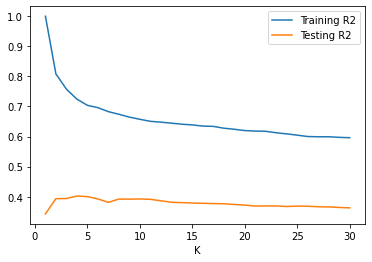

In [7]:
plot1 = results.plot.line(x='K', y ='Training R2')
results.plot.line(x='K', y = 'Testing R2', ax =plot1)

In [8]:
lr = LinearRegression(n_jobs=4)
lr.fit(X_train,y_train)
print('LinearRegression Train Score', lr.score(X_train,y_train).round(3))
print('LinearRegression Test Score', lr.score(X_test,y_test).round(3))

LinearRegression Train Score 0.669
LinearRegression Test Score -2.1043021595499917e+22


In [9]:
grid = {'max_depth': np.arange(1,20)}
Tree = DecisionTreeRegressor()
TreeCV = GridSearchCV(Tree, param_grid = grid, return_train_score = True)

In [10]:
TreeCV.fit(X_train,y_train)
print('Best depth:', TreeCV.best_params_)

Best depth: {'max_depth': 3}


In [11]:
print('Tree Train Score',TreeCV.score(X_train,y_train).round(3))
print('Tree Test Score',TreeCV.score(X_test,y_test).round(3))

Tree Train Score 0.606
Tree Test Score 0.388
